importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

importing and merging domestic visitor files

In [2]:
dv2016 = pd.read_csv('domestic_visitors_2016.csv')
dv2017 = pd.read_csv('domestic_visitors_2017.csv')
dv2018 = pd.read_csv('domestic_visitors_2018.csv')
dv2019 = pd.read_csv('domestic_visitors_2019.csv')

domestic_visitors = pd.concat([dv2016, dv2017, dv2018, dv2019],ignore_index = True)

domestic_visitors.to_csv('domestic_visitors.csv', index = False)

In [3]:
domestic_visitors = pd.read_csv('domestic_visitors.csv')

domestic_visitors.head()

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887


importing and merging foreign visitors file

In [4]:
fv2016 = pd.read_csv('foreign_visitors_2016.csv')
fv2017 = pd.read_csv('foreign_visitors_2017.csv')
fv2018 = pd.read_csv('foreign_visitors_2018.csv')
fv2019 = pd.read_csv('foreign_visitors_2019.csv')

foreign_visitors = pd.concat([fv2016, fv2017, fv2018, fv2019],ignore_index = True)

foreign_visitors.to_csv('foreign_visitors.csv', index = False)

In [5]:
foreign_visitors = pd.read_csv('foreign_visitors.csv')

foreign_visitors.head()

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,2
1,Adilabad,01-02-2016,February,2016,0
2,Adilabad,01-03-2016,March,2016,2
3,Adilabad,01-04-2016,April,2016,0
4,Adilabad,01-05-2016,May,2016,0


**Data cleaning** : Domestic

In [7]:
domestic_visitors.isnull().sum()

district     0
date         0
month        0
year         0
visitors    30
dtype: int64

In [8]:
domestic_visitors.replace([" ", np.nan], 0,  inplace=True)

In [9]:
domestic_visitors.isnull().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [10]:
domestic_visitors.dtypes

district    object
date        object
month       object
year         int64
visitors    object
dtype: object

In [11]:
domestic_visitors["visitors"] = domestic_visitors.visitors.astype("int64")

In [12]:
domestic_visitors.drop_duplicates()
domestic_visitors.head()

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887


In [13]:
domestic_visitors.to_csv('domestic_visitors')

**Data cleaning** : Foreign

In [14]:
foreign_visitors.isnull().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [15]:
foreign_visitors.replace(' ', 0, inplace = True)

In [19]:
foreign_visitors["visitors"] = foreign_visitors.visitors.astype("int64")

In [20]:
foreign_visitors.drop_duplicates()
foreign_visitors.head()

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,2
1,Adilabad,01-02-2016,February,2016,0
2,Adilabad,01-03-2016,March,2016,2
3,Adilabad,01-04-2016,April,2016,0
4,Adilabad,01-05-2016,May,2016,0


In [21]:
foreign_visitors.to_csv('foreign_visitors')

In [22]:
df = pd.DataFrame({"foreign":foreign_visitors.groupby("district")["visitors"].sum()})

In [24]:
df['domestic'] = domestic_visitors.groupby('district')['visitors'].sum()

In [25]:
df.shape

(33, 2)

In [26]:
df.isnull().sum()

foreign     0
domestic    1
dtype: int64

In [27]:
df = df.replace(np.nan, 0)

**<h3>List down the top 10 districts that have the highest number of domestic visitors overall(2016-2019)?</h3>**

In [28]:
top_districts_d = domestic_visitors.groupby('district')['visitors'].sum().sort_values(ascending = False).head(10)

top_districts_d

district
Hyderabad                   83900960
Rajanna Sircilla            41763276
Warangal (Urban)            30726603
Yadadri Bhongir             26893080
Bhadradri Kothagudem        21600962
Medak                       20542639
Jayashankar Bhoopalpally    19632865
Mahbubnagar                 17180118
Nirmal                      13315796
Jagtial                     11303514
Name: visitors, dtype: int64

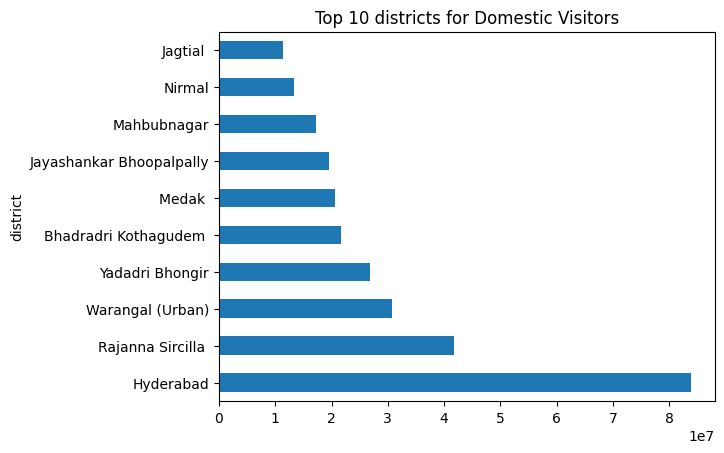

In [29]:
top_districts_d.plot(kind = 'barh', title = 'Top 10 districts for Domestic Visitors')
plt.show()

**<h3>List down the top 10 districts that have the highest number of foreign visitors overall(2016-2019)?</h3>**

In [30]:
top_districts_f = foreign_visitors.groupby('district')['visitors'].sum().sort_values(ascending = False).head(10) 

top_districts_f

district
Hyderabad                   1044898
Warangal (Urban)               8821
Mahbubnagar                    2282
Jayashankar Bhoopalpally       1252
Jogulamba Gadwal                945
Nagarkurnool                    761
Mulugu                          575
Warangal (Rural)                306
Adilabad                         32
Mancherial                       10
Name: visitors, dtype: int64

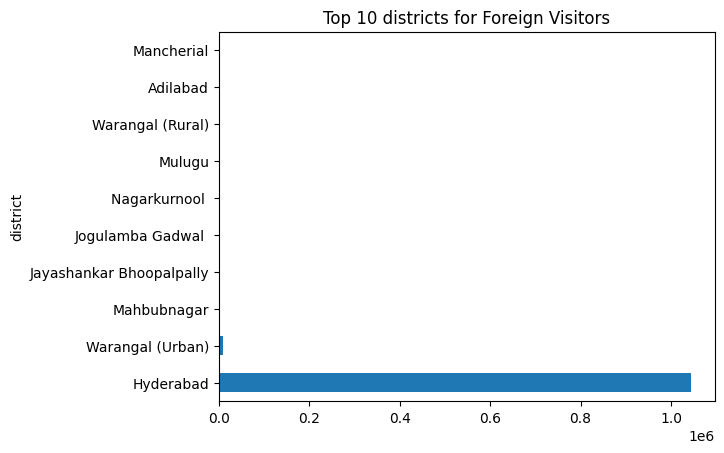

In [31]:
top_districts_f.plot(kind = 'barh', title = 'Top 10 districts for Foreign Visitors')
plt.show()

In [32]:
total_visitors = pd.concat([domestic_visitors, foreign_visitors])
total_visitors.head()


,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887


In [33]:
total_visitors.to_csv('total_visitors.csv')

In [34]:
top_districts_total = total_visitors.groupby('district')['visitors'].sum().sort_values(ascending = False).nlargest(10)

top_districts_total

district
Hyderabad                   84945858
Rajanna Sircilla            41763276
Warangal (Urban)            30735424
Yadadri Bhongir             26893080
Bhadradri Kothagudem        21600962
Medak                       20542639
Jayashankar Bhoopalpally    19634117
Mahbubnagar                 17182400
Nirmal                      13315798
Jagtial                     11303514
Name: visitors, dtype: int64

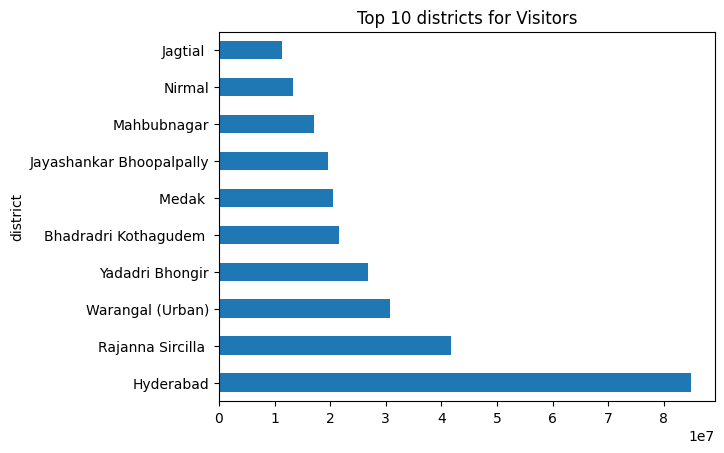

In [35]:
top_districts_total.plot(kind = 'barh', title = 'Top 10 districts for Visitors')
plt.show()

**<h3>List down the top 3 districts based on Compounded Annual Growth Rate (CAGR) of visitors between (2016-2019)?</h3>**

In [36]:
pd.set_option("display.max_rows", None)

In [37]:
domestic_visitors.groupby(["year", "district"])['visitors'].sum()

year  district                
2016  Adilabad                     5075557
      Bhadradri Kothagudem          889030
      Hyderabad                   23394705
      Jagtial                       623077
      Jangaon                        40660
      Jayashankar Bhoopalpally      243400
      Jogulamba Gadwal              523401
      Kamareddy                        127
      Karimnagar                   9167468
      Khammam                      5005031
      Komaram Bheem Asifabad             0
      Mahabubabad                   140002
      Mahbubnagar                  8304766
      Mancherial                      7802
      Medak                        3463200
      Medchal                            0
      Nagarkurnool                  588473
      Nalgonda                     5858461
      Nirmal                        916610
      Nizamabad                       6442
      Peddapalli                      3244
      Rajanna Sircilla             2176801
      Ranga Reddy      

In [38]:
districts = domestic_visitors['district'].unique()
districts

array(['Adilabad', 'Bhadradri Kothagudem ', 'Hyderabad', 'Jagtial ',
       'Jangaon ', 'Jayashankar Bhoopalpally', 'Jogulamba Gadwal ',
       'Kamareddy ', 'Karimnagar ', 'Khammam', 'Komaram Bheem Asifabad',
       'Mahabubabad ', 'Mahbubnagar', 'Mancherial', 'Medak ', 'Medchal ',
       'Nagarkurnool ', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli',
       'Rajanna Sircilla ', 'Ranga Reddy', 'Sangareddy ', 'Siddipet',
       'Suryapet', 'Vikarabad', 'Wanaparthy ', 'Warangal (Rural)',
       'Warangal (Urban)', 'Yadadri Bhongir', 'Mulugu', 'Narayanapet'],
      dtype=object)

In [39]:
domestic_cagr = pd.DataFrame({"district":districts})


In [40]:
domestic_2016 = domestic_visitors[domestic_visitors["year"] == 2016]

dom_2016 = []

for district in districts:
    total_visitors = domestic_2016[domestic_2016["district"] == district]["visitors"].sum()
    dom_2016.append(total_visitors)

domestic_cagr["2016"] = dom_2016


In [41]:
domestic_2019 = domestic_visitors[domestic_visitors["year"] == 2019]

dom_2019 = []

for district in districts:
    total_visitors = domestic_2019[domestic_2019["district"] == district]["visitors"].sum()
    dom_2019.append(total_visitors)

domestic_cagr["2019"] = dom_2019

In [42]:
domestic_cagr.head()

,district,2016,2019
0,Adilabad,5075557,775895
1,Bhadradri Kothagudem,889030,12817737
2,Hyderabad,23394705,13802362
3,Jagtial,623077,3086115
4,Jangaon,40660,328890


In [43]:
cagr=[]
for i in range(len(districts)):
    final_val = domestic_cagr.loc[i,"2019"]
    initial_val = domestic_cagr.loc[i,"2016"]
    cagrr = (((final_val/initial_val)**(1/3))-1)
    cagr.append(cagrr)


C:\Users\karan\AppData\Local\Temp\ipykernel_7568\761365333.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  cagrr = (((final_val/initial_val)**(1/3))-1)
C:\Users\karan\AppData\Local\Temp\ipykernel_7568\761365333.py:5: RuntimeWarning: invalid value encountered in scalar divide
  cagrr = (((final_val/initial_val)**(1/3))-1)


In [44]:
domestic_cagr['CAGR'] = cagr

In [45]:
domestic_cagr.replace([np.inf, np.nan], 0, inplace = True)

In [46]:
domestic_cagr.to_csv('domestic_cagr.csv')

In [47]:
domestic_cagr

,district,2016,2019,CAGR
0,Adilabad,5075557,775895,-0.465305
1,Bhadradri Kothagudem,889030,12817737,1.433875
2,Hyderabad,23394705,13802362,-0.161290
3,Jagtial,623077,3086115,0.704604
4,Jangaon,40660,328890,1.007372
5,Jayashankar Bhoopalpally,243400,662530,0.396245
6,Jogulamba Gadwal,523401,2007995,0.565463
7,Kamareddy,127,534,0.614033
8,Karimnagar,9167468,77491,-0.796296
9,Khammam,5005031,1413440,-0.343920


top 3 districts by CAGR (domestic)

In [48]:
top_districts_cagr = domestic_cagr.sort_values(by = 'CAGR', ascending = False).head(3)
top_districts_cagr = top_districts_cagr.reset_index(drop=True)
top_districts_cagr

,district,2016,2019,CAGR
0,Mancherial,7802,269810,2.257997
1,Warangal (Rural),19400,353500,1.631455
2,Bhadradri Kothagudem,889030,12817737,1.433875


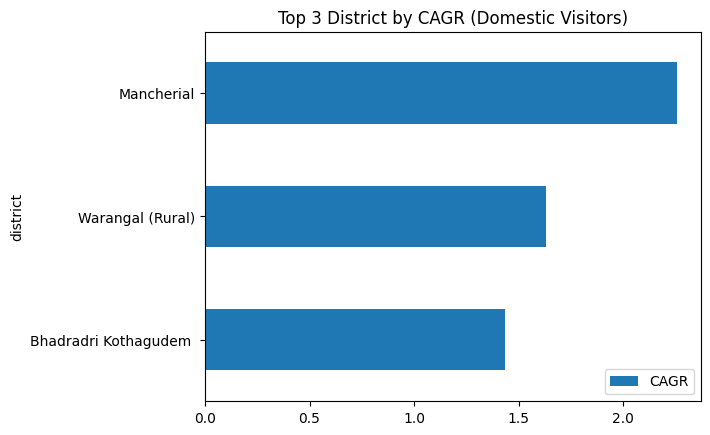

In [49]:
top_districts_cagr.plot('district', 'CAGR', kind = 'barh', title = 'Top 3 District by CAGR (Domestic Visitors)' )
plt.gca().invert_yaxis()
plt.show()

Bottom 3 districts by CAGR (domestic)

In [50]:
btm_districts_cagr = domestic_cagr.sort_values(by = 'CAGR', ascending = True).head(3)
btm_districts_cagr = btm_districts_cagr.reset_index(drop=True)
btm_districts_cagr

,district,2016,2019,CAGR
0,Karimnagar,9167468,77491,-0.796296
1,Nalgonda,5858461,140918,-0.711335
2,Warangal (Urban),25788035,1795230,-0.588629


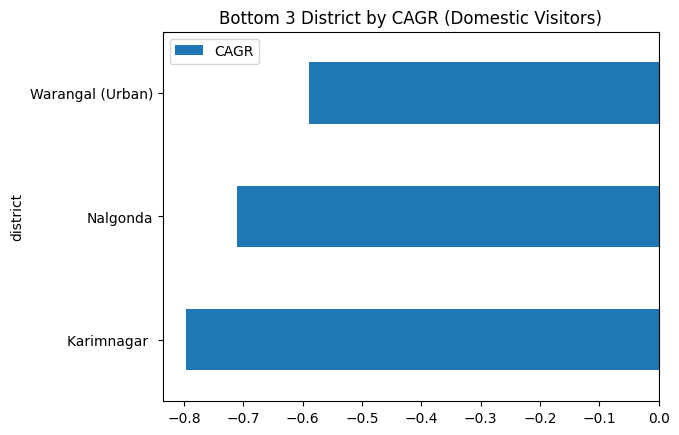

In [51]:
btm_districts_cagr.plot('district', 'CAGR', kind = 'barh', title = 'Bottom 3 District by CAGR (Domestic Visitors)')
plt.show()
                        

In [52]:
foreign_visitors.groupby(["year", "district"])['visitors'].sum()

year  district                
2016  Adilabad                        10
      Bhadradri Kothagudem             0
      Hyderabad                   163631
      Jagtial                          0
      Jangaon                          2
      Jayashankar Bhoopalpally        86
      Jogulamba Gadwal                45
      Kamareddy                        0
      Karimnagar                       0
      Khammam                          0
      Komaram Bheem Asifabad           0
      Mahabubabad                      0
      Mahbubnagar                    868
      Mancherial                       0
      Medak                            0
      Medchal                          0
      Nagarkurnool                    29
      Nalgonda                         0
      Nirmal                           0
      Nizamabad                        0
      Peddapalli                       0
      Rajanna Sircilla                 0
      Ranga Reddy                      0
      Sangareddy          

In [53]:
foreign_cagr = pd.DataFrame({'district' : districts})

In [54]:
foreign_2016 = foreign_visitors[foreign_visitors['year'] == 2016]

for_2016 = []

for district in districts:
    total_visitor = foreign_2016[foreign_2016['district']== district]['visitors'].sum()
    for_2016.append(total_visitor)

foreign_cagr['2016'] = for_2016
    

In [55]:
foreign_2019 = foreign_visitors[foreign_visitors['year'] == 2019]

for_2019 = []

for district in districts:
    total_visitor = foreign_2019[foreign_2019['district']== district]['visitors'].sum()
    for_2019.append(total_visitor)

foreign_cagr['2019'] = for_2019

In [56]:
cagr=[]
for i in range(len(districts)):
    fv = foreign_cagr.loc[i,"2019"]
    iv = foreign_cagr.loc[i,"2016"]
    cagrr = (((fv/iv)**(1/3))-1)
    cagr.append(cagrr)

foreign_cagr['CAGR'] = cagr


C:\Users\karan\AppData\Local\Temp\ipykernel_7568\184276397.py:5: RuntimeWarning: invalid value encountered in scalar divide
  cagrr = (((fv/iv)**(1/3))-1)
C:\Users\karan\AppData\Local\Temp\ipykernel_7568\184276397.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  cagrr = (((fv/iv)**(1/3))-1)


In [57]:
foreign_cagr.head()

,district,2016,2019,CAGR
0,Adilabad,10,6,-0.156567
1,Bhadradri Kothagudem,0,0,NaN
2,Hyderabad,163631,319300,0.249619
3,Jagtial,0,0,NaN
4,Jangaon,2,0,-1.000000


In [58]:
foreign_cagr.replace([np.inf, np.nan], 0, inplace = True)

top 3 districts by CAGR (foreign)

In [59]:
top_frgn_cagr = foreign_cagr.sort_values(by = 'CAGR', ascending = False).head(3)
top_frgn_cagr = top_frgn_cagr.reset_index(drop = True)
top_frgn_cagr

,district,2016,2019,CAGR
0,Nagarkurnool,29,199,0.900283
1,Jogulamba Gadwal,45,295,0.871557
2,Hyderabad,163631,319300,0.249619


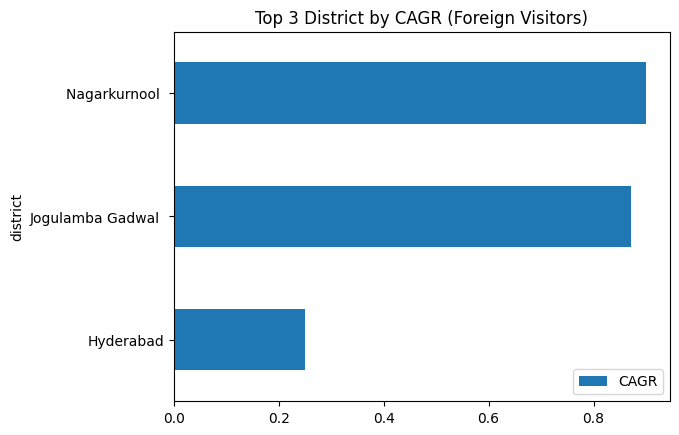

In [60]:
top_frgn_cagr.plot('district', 'CAGR', kind = 'barh', title = 'Top 3 District by CAGR (Foreign Visitors)')
plt.gca().invert_yaxis()
plt.show()

Bottom 3 districts by CAGR (foreign)

In [61]:
btm_frgn_cagr = foreign_cagr.sort_values(by = 'CAGR', ascending = True).head(3)
btm_frgn_cagr = btm_frgn_cagr.reset_index(drop = True)
btm_frgn_cagr

,district,2016,2019,CAGR
0,Jangaon,2,0,-1.000000
1,Mahbubnagar,868,440,-0.202659
2,Jayashankar Bhoopalpally,86,45,-0.194180


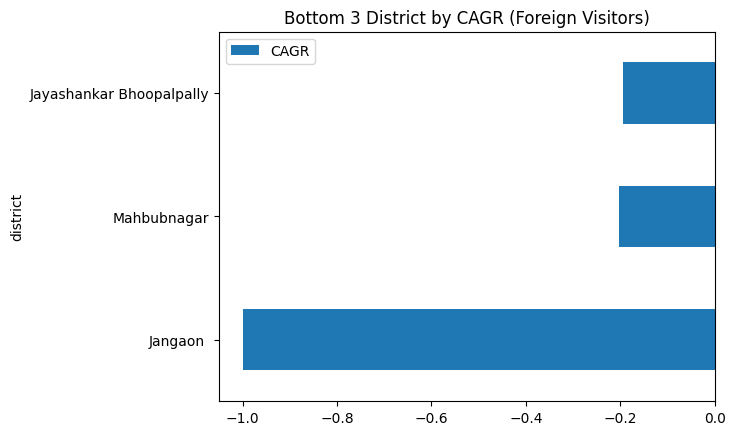

In [62]:
btm_frgn_cagr.plot('district', 'CAGR', kind = 'barh', title = 'Bottom 3 District by CAGR (Foreign Visitors)')
plt.show()

In [63]:
foreign_cagr.to_csv('foreign_cagr.csv')

**<h3>Monthly Visitors for Hyderabad</h3>**

In [64]:
hyd_visitors = domestic_visitors[domestic_visitors['district'] == 'Hyderabad'] 

In [65]:
dom_hyd_visitors = hyd_visitors.groupby(['year','month'])['visitors'].sum()
dom_hyd_visitors = pd.DataFrame(dom_hyd_visitors)
dom_hyd_visitors.reset_index(inplace = True) 
 

In [66]:
hyd_visitors_2016 = dom_hyd_visitors[dom_hyd_visitors['year'] == 2016]


In [67]:
hyd_2016_max = hyd_visitors_2016.sort_values(by ='visitors', ascending = False).head(5)


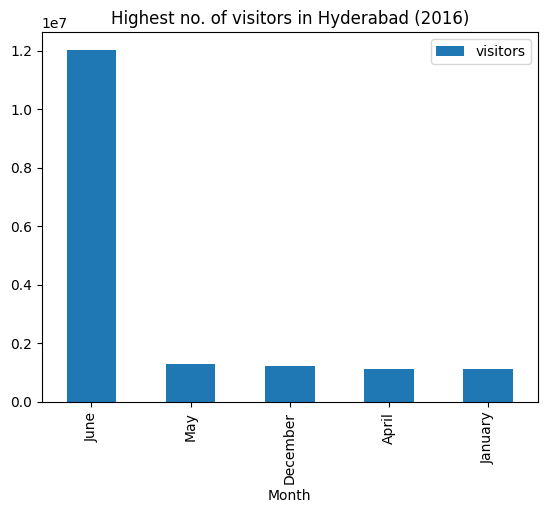

In [68]:
hyd_2016_max.plot('month', 'visitors', kind = 'bar', title = 'Highest no. of visitors in Hyderabad (2016)')
plt.xlabel('Month')
plt.show()

In [69]:
hyd_visitors_2017 = dom_hyd_visitors[dom_hyd_visitors['year'] == 2017]

In [70]:
hyd_2017_max = hyd_visitors_2017.sort_values(by ='visitors', ascending = False).head(5)

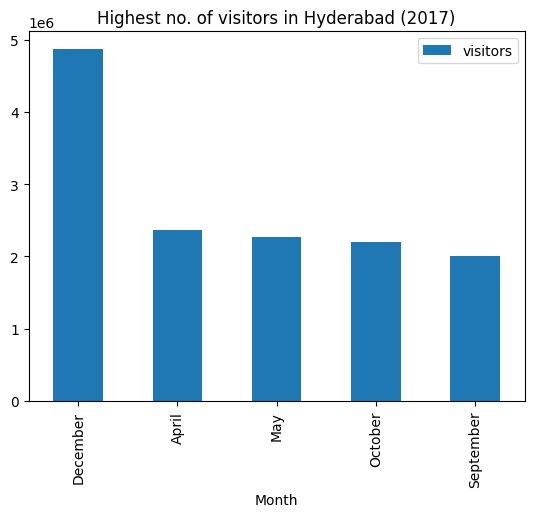

In [71]:
hyd_2017_max.plot('month', 'visitors', kind = 'bar', title = 'Highest no. of visitors in Hyderabad (2017)')
plt.xlabel('Month')
plt.show()

In [72]:
hyd_visitors_2018 = dom_hyd_visitors[dom_hyd_visitors['year'] == 2018]


In [73]:
hyd_2018_max = hyd_visitors_2018.sort_values(by ='visitors', ascending = False).head(5)

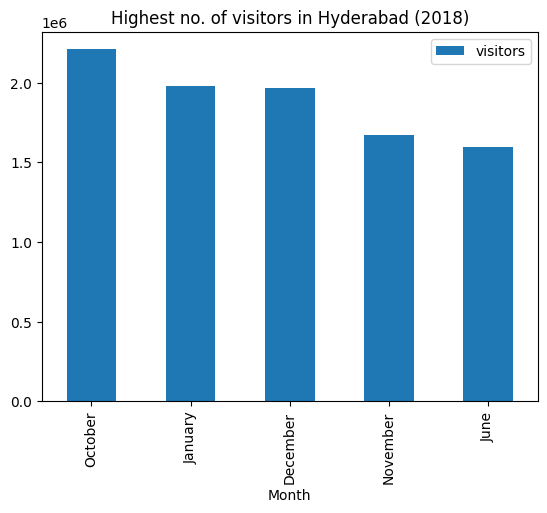

In [74]:
hyd_2018_max.plot('month', 'visitors', kind = 'bar', title = 'Highest no. of visitors in Hyderabad (2018)')
plt.xlabel('Month')
plt.show()

In [75]:
hyd_visitors_2019 = dom_hyd_visitors[dom_hyd_visitors['year'] == 2019]

In [76]:
hyd_2019_max = hyd_visitors_2019.sort_values(by ='visitors', ascending = False).head(5)

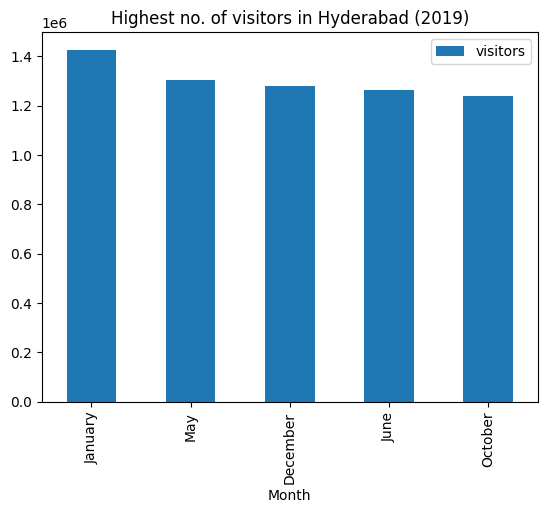

In [77]:
hyd_2019_max.plot('month', 'visitors', kind = 'bar', title = 'Highest no. of visitors in Hyderabad (2019)')
plt.xlabel('Month')
plt.show()

**<h3> D/F Ratio </h3>**

In [78]:
df

,foreign,domestic
district,,
Adilabad,32,7321575.0
Bhadradri Kothagudem,0,21600962.0
Hyderabad,1044898,83900960.0
Jagtial,0,11303514.0
Jangaon,2,826280.0
Jayashankar Bhoopalpally,1252,19632865.0
Jogulamba Gadwal,945,6813340.0
Kamareddy,0,1773.0
Karimnagar,0,9462383.0


In [79]:
df["d/f Ratio"] = df['domestic']/df['foreign']
df

,foreign,domestic,d/f Ratio
district,,,
Adilabad,32,7321575.0,2.287992e+05
Bhadradri Kothagudem,0,21600962.0,inf
Hyderabad,1044898,83900960.0,8.029584e+01
Jagtial,0,11303514.0,inf
Jangaon,2,826280.0,4.131400e+05
Jayashankar Bhoopalpally,1252,19632865.0,1.568120e+04
Jogulamba Gadwal,945,6813340.0,7.209884e+03
Kamareddy,0,1773.0,inf
Karimnagar,0,9462383.0,inf


In [80]:
df = df.replace([np.nan, np.inf], 0)

In [81]:
df_ratio = df.sort_values(by = 'd/f Ratio', ascending = False).where(df['foreign']>100)

In [82]:
df_ratio = df_ratio.dropna()

In [83]:
df_ratio.sort_values(by = "d/f Ratio", ascending = True, inplace = True)

In [84]:
df_ratio = df_ratio.reset_index()

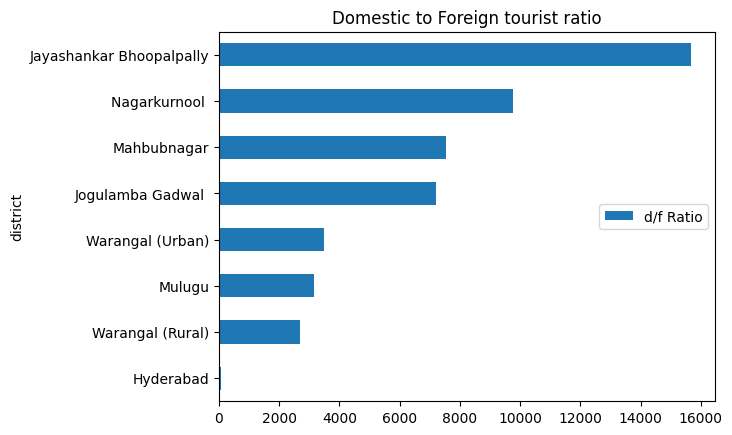

In [85]:
df_ratio.plot('district', 'd/f Ratio', kind = 'barh', title = 'Domestic to Foreign tourist ratio')
plt.legend(loc = 'right')
plt.show()

**<h3>Population to Tourist footfall ratio</h3>**

In [86]:
telangana_pop = pd.read_csv('telangana_population.csv')

In [87]:
telangana_pop.sort_values(by = 'District Name', inplace = True) 
telangana_pop

,District Name,As per 2011 census,Estimated Population in 2025,2019 Population
0,Adilabad,708972,768667,743083
1,Bhadradri Kothagudem,1069261,1159293,1120708
2,Hyderabad,3943323,4275351,4133053
3,Jagitial,985417,1068389,1032830
4,Jangaon,566376,614065,593627
5,Jayashankar Bhupalpally,416763,451854,436815
6,Jogulamba Gadwal,609990,661351,639339
7,Kamareddy,972625,1054520,1019422
8,Karimnagar,1005711,1090392,1054100
9,Khammam,1401639,1519657,1469078


In [88]:
domestic_cagr = domestic_cagr.sort_values(by="district")

In [89]:
domestic_cagr.reset_index(inplace=True)
domestic_cagr.drop("index", axis=1, inplace=True)

In [90]:
telangana_pop['dom_visitors'] = domestic_cagr['2019']

In [91]:
telangana_pop['for_visitors'] = foreign_cagr['2019']

In [92]:
telangana_pop.head()

,District Name,As per 2011 census,Estimated Population in 2025,2019 Population,dom_visitors,for_visitors
0,Adilabad,708972,768667,743083,775895,6
1,Bhadradri Kothagudem,1069261,1159293,1120708,12817737,0
2,Hyderabad,3943323,4275351,4133053,13802362,319300
3,Jagitial,985417,1068389,1032830,3086115,0
4,Jangaon,566376,614065,593627,328890,0


In [93]:
total=[]
for i in range(len(telangana_pop)):
    sum = telangana_pop.iloc[i,4] + telangana_pop.iloc[i,5]
    total.append(sum)

In [94]:
telangana_pop['total visitors'] = total

In [95]:
telangana_pop['VP ratio'] = (telangana_pop['total visitors']/telangana_pop['2019 Population']).round(decimals = 2)

In [96]:
telangana_pop.sort_values(by = 'VP ratio', ascending = False, inplace = True)

In [97]:
telangana_pop.head()

,District Name,As per 2011 census,Estimated Population in 2025,2019 Population,dom_visitors,for_visitors,total visitors,VP ratio
23,Rajanna Sircilla,552037,598519,578598,16832897,0,16832897,29.09
1,Bhadradri Kothagudem,1069261,1159293,1120708,12817737,0,12817737,11.44
14,Medak,767428,832045,804352,5452570,0,5452570,6.78
16,Mulugu,257744,279446,270145,1819800,199,1819999,6.74
32,Yadadri Bhuvanagiri,739448,801710,775026,4489374,0,4489374,5.79


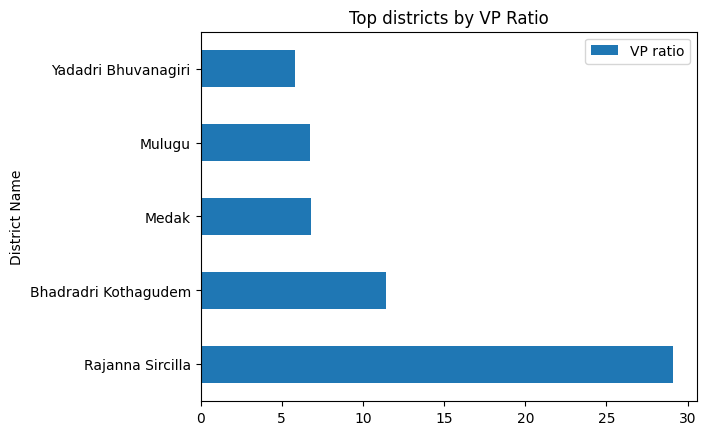

In [98]:
telangana_pop.head().plot('District Name', 'VP ratio', kind = 'barh', title = 'Top districts by VP Ratio')
plt.show()

In [99]:
telangana_pop.tail()

,District Name,As per 2011 census,Estimated Population in 2025,2019 Population,dom_visitors,for_visitors,total visitors,VP ratio
7,Kamareddy,972625,1054520,1019422,534,0,534,0.0
15,Medchal–Malkajgiri,2440073,2645527,2557475,0,0,0,0.0
28,Vikarabad,927140,1005205,971749,0,0,0,0.0
27,Suryapet,1099560,1192143,1152465,0,0,0,0.0
24,Ranga Reddy,2446265,2652241,2563966,0,0,0,0.0


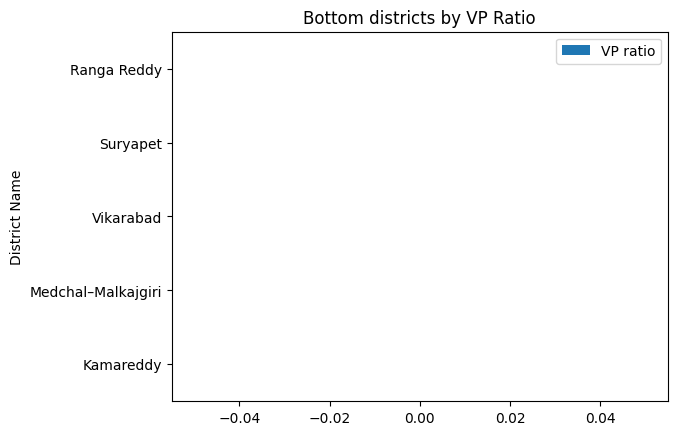

In [100]:
telangana_pop.tail().plot('District Name', 'VP ratio', kind = 'barh', title = 'Bottom districts by VP Ratio')
plt.show()

**<h3>2025 tourist projection in Hyderabad</h3>**

In [101]:
hyd_dom_cagr = domestic_cagr[domestic_cagr['district'] == 'Hyderabad']
hyd_dom_cagr = hyd_dom_cagr['CAGR']

In [102]:
hyd_dom_2025 = dom_hyd_visitors[dom_hyd_visitors['year'] == 2019]
hyd_2025_monthly = []

for i in range(len(hyd_dom_2025)):
    visitors_2019 = hyd_dom_2025.iloc[i]['visitors']  
    projection_2025 = visitors_2019 * (1 + hyd_dom_cagr) ** 6   
    hyd_2025_monthly.append(projection_2025)              


hyd_dom_2025['projection_2025'] = hyd_2025_monthly

hyd_dom_2025


C:\Users\karan\AppData\Local\Temp\ipykernel_7568\3376519442.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyd_dom_2025['projection_2025'] = hyd_2025_monthly


,year,month,visitors,projection_2025
36,2019,April,1045933,"2 877234.720178 Name: CAGR, dtype: float64"
37,2019,August,1121380,"2 940512.891851 Name: CAGR, dtype: float64"
38,2019,December,1277569,"2 1.071510e+06 Name: CAGR, dtype: float64"
39,2019,February,983147,"2 824575.458885 Name: CAGR, dtype: float64"
40,2019,January,1426500,"2 1.196420e+06 Name: CAGR, dtype: float64"
41,2019,July,1094861,"2 918271.134928 Name: CAGR, dtype: float64"
42,2019,June,1262995,"2 1.059287e+06 Name: CAGR, dtype: float64"
43,2019,March,1009991,"2 847089.796638 Name: CAGR, dtype: float64"
44,2019,May,1305748,"2 1.095144e+06 Name: CAGR, dtype: float64"
45,2019,November,1073665,"2 900493.832626 Name: CAGR, dtype: float64"


In [103]:
hyd_dom_2025['projection_2025'] = hyd_dom_2025['projection_2025'].astype(int)

C:\Users\karan\AppData\Local\Temp\ipykernel_7568\4145946258.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  hyd_dom_2025['projection_2025'] = hyd_dom_2025['projection_2025'].astype(int)
C:\Users\karan\AppData\Local\Temp\ipykernel_7568\4145946258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyd_dom_2025['projection_2025'] = hyd_dom_2025['projection_2025'].astype(int)


In [104]:
hyd_dom_2025.reset_index(drop = True, inplace = True)

In [105]:
hyd_dom_2025.head()

,year,month,visitors,projection_2025
0,2019,April,1045933,877234
1,2019,August,1121380,940512
2,2019,December,1277569,1071510
3,2019,February,983147,824575
4,2019,January,1426500,1196420


In [106]:
hyd_dom_2025.to_csv('hyd_dom_2025')

In [107]:
hyd_for_visitors = foreign_visitors[foreign_visitors['district'] == 'Hyderabad']

In [108]:
hyd_for_2025 = hyd_for_visitors[hyd_for_visitors['year'] == 2019]

In [109]:
hyd_for_cagr = foreign_cagr[foreign_cagr['district'] == 'Hyderabad']
hyd_for_cagr = hyd_for_cagr['CAGR']

In [110]:
hyd_2025_monthly = []

for i in range(len(hyd_for_2025)):
    visitors_2019 = hyd_for_2025.iloc[i]['visitors']  
    projection_2025 = visitors_2019 * (1 + hyd_for_cagr) ** 6   
    hyd_2025_monthly.append(projection_2025)              


hyd_for_2025['projection_2025'] = hyd_2025_monthly

hyd_for_2025.head()

C:\Users\karan\AppData\Local\Temp\ipykernel_7568\4185609579.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyd_for_2025['projection_2025'] = hyd_2025_monthly


,district,date,month,year,visitors,projection_2025
1140,Hyderabad,01-01-2019,January,2019,35920,"2 44886.330824 Name: CAGR, dtype: float64"
1141,Hyderabad,01-02-2019,February,2019,25621,"2 32016.500057 Name: CAGR, dtype: float64"
1142,Hyderabad,01-03-2019,March,2019,21929,"2 27402.905029 Name: CAGR, dtype: float64"
1143,Hyderabad,01-04-2019,April,2019,18267,"2 22826.798585 Name: CAGR, dtype: float64"
1144,Hyderabad,01-05-2019,May,2019,17317,"2 21639.660103 Name: CAGR, dtype: float64"


In [111]:
hyd_for_2025['projection_2025'] = hyd_for_2025['projection_2025'].astype(int)

C:\Users\karan\AppData\Local\Temp\ipykernel_7568\1012635457.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  hyd_for_2025['projection_2025'] = hyd_for_2025['projection_2025'].astype(int)
C:\Users\karan\AppData\Local\Temp\ipykernel_7568\1012635457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyd_for_2025['projection_2025'] = hyd_for_2025['projection_2025'].astype(int)


In [112]:
hyd_for_2025.drop(columns = 'date', inplace = True)

C:\Users\karan\AppData\Local\Temp\ipykernel_7568\122722210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyd_for_2025.drop(columns = 'date', inplace = True)


In [113]:
hyd_for_2025.reset_index(drop = True)

,district,month,year,visitors,projection_2025
0,Hyderabad,January,2019,35920,44886
1,Hyderabad,February,2019,25621,32016
2,Hyderabad,March,2019,21929,27402
3,Hyderabad,April,2019,18267,22826
4,Hyderabad,May,2019,17317,21639
5,Hyderabad,June,2019,20077,25088
6,Hyderabad,July,2019,27874,34831
7,Hyderabad,August,2019,22725,28397
8,Hyderabad,September,2019,34018,42509
9,Hyderabad,October,2019,28706,35871


**<h3>Tourism Revenue</h3>**

In [114]:
tourism_rev = pd.read_csv('tourism_rev.csv')
tourism_rev.head()

,tourist,average revenue
0,Foreign,5600
1,Domestic,1200


In [115]:
for_rev =  tourism_rev.loc[0]['average revenue']
dom_rev = tourism_rev.loc[1]['average revenue']

In [116]:
domestic_rev = []
for i in (hyd_dom_2025['projection_2025']):
    revenue = i * dom_rev
    domestic_rev.append(revenue)


hyd_dom_2025 ['rev_projection'] = domestic_rev  

hyd_dom_2025 ['rev_projection'] = hyd_dom_2025 ['rev_projection'].astype(int)

C:\Users\karan\AppData\Local\Temp\ipykernel_7568\1284520747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyd_dom_2025 ['rev_projection'] = domestic_rev
C:\Users\karan\AppData\Local\Temp\ipykernel_7568\1284520747.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyd_dom_2025 ['rev_projection'] = hyd_dom_2025 ['rev_projection'].astype(int)


In [117]:
hyd_dom_2025

,year,month,visitors,projection_2025,rev_projection
0,2019,April,1045933,877234,1052680800
1,2019,August,1121380,940512,1128614400
2,2019,December,1277569,1071510,1285812000
3,2019,February,983147,824575,989490000
4,2019,January,1426500,1196420,1435704000
5,2019,July,1094861,918271,1101925200
6,2019,June,1262995,1059286,1271143200
7,2019,March,1009991,847089,1016506800
8,2019,May,1305748,1095144,1314172800
9,2019,November,1073665,900493,1080591600


In [118]:
hyd_dom_2025.to_csv('hyd_dom_2025')

In [119]:
foreign_rev = []
for i in (hyd_for_2025['projection_2025']):
    revenue = i * for_rev
    foreign_rev.append(revenue)


hyd_for_2025 ['rev_projectionf'] = foreign_rev  

hyd_for_2025 ['rev_projectionf'] = hyd_for_2025 ['rev_projectionf'].astype(int)

C:\Users\karan\AppData\Local\Temp\ipykernel_7568\180605196.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyd_for_2025 ['rev_projectionf'] = foreign_rev
C:\Users\karan\AppData\Local\Temp\ipykernel_7568\180605196.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyd_for_2025 ['rev_projectionf'] = hyd_for_2025 ['rev_projectionf'].astype(int)


In [120]:
hyd_for_2025.reset_index(inplace = True)

In [121]:
hyd_for_2025.head()

,index,district,month,year,visitors,projection_2025,rev_projectionf
0,1140,Hyderabad,January,2019,35920,44886,251361600
1,1141,Hyderabad,February,2019,25621,32016,179289600
2,1142,Hyderabad,March,2019,21929,27402,153451200
3,1143,Hyderabad,April,2019,18267,22826,127825600
4,1144,Hyderabad,May,2019,17317,21639,121178400


In [122]:
hyd_for_2025.to_csv('hyd_for_2025')

**<h3>(2016-2019) vs (2020-2023)</h3>**

In [123]:
dv2020 = pd.read_csv('Tourism Domestic Visitors Data 2020_0.csv')
dv2021 = pd.read_csv('Tourism Domestic Visitors Data 2021.csv')
dv2022 = pd.read_csv('Tourism Domestic Visitors Data 2022.csv')
dv2023 = pd.read_csv('Tourism Domestic Visitors Data 2023.csv')

domestic20_23 = pd.concat([dv2020, dv2021, dv2022, dv2023],ignore_index = True)

domestic20_23.to_csv('domestic_visitors20_23.csv', index = False)

In [124]:
domestic20_23 = pd.read_csv('domestic_visitors20_23.csv')
domestic20_23.head()


,District,year,Month,Visitors
0,Adilabad,2020,January,621850
1,Adilabad,2020,February,29421
2,Adilabad,2020,March,9430
3,Adilabad,2020,April,NaN
4,Adilabad,2020,May,NaN


In [125]:
fv2020 = pd.read_csv('Tourism Foreign Visitors Data 2020_0.csv')
fv2021 = pd.read_csv('Tourism Foreign Visitors Data 2021.csv')
fv2022 = pd.read_csv('Tourism Foreign Visitors Data 2022.csv')
fv2023 = pd.read_csv('Tourism Foreign Visitors Data 2023.csv')

foreign20_23 = pd.concat([fv2020, fv2021, fv2022, fv2023],ignore_index = True)

foreign20_23.to_csv('foreign_visitors20_23.csv', index = False)

In [126]:
foreign20_23 = pd.read_csv('foreign_visitors20_23.csv')
foreign20_23.head()


,District,year,Month,Visitors
0,Adilabad,2020,January,0
1,Adilabad,2020,February,0
2,Adilabad,2020,March,0
3,Adilabad,2020,April,0
4,Adilabad,2020,May,0


<h3>Data Cleaning</h3>

In [127]:
domestic20_23.isnull().sum()

District     0
year         0
Month        0
Visitors    69
dtype: int64

In [128]:
domestic20_23.replace([" ", np.nan], 0,  inplace=True)

In [129]:
domestic20_23.isnull().sum()

District    0
year        0
Month       0
Visitors    0
dtype: int64

In [130]:
domestic20_23.dtypes

District    object
year         int64
Month       object
Visitors    object
dtype: object

In [131]:
domestic20_23["Visitors"] = domestic20_23.Visitors.astype("int64")

In [132]:
domestic20_23.drop_duplicates()
domestic20_23.head()

,District,year,Month,Visitors
0,Adilabad,2020,January,621850
1,Adilabad,2020,February,29421
2,Adilabad,2020,March,9430
3,Adilabad,2020,April,0
4,Adilabad,2020,May,0


In [133]:
domestic20_23['District'] = domestic20_23['District'].replace({'BhadradriKothagudem': 'Bhadradri Kothagudem',
                       'Hunmakonda': 'Warangal (Urban)',
                       'Jangann' : 'Jangaon',
                      'Jayashankarnhoopalpally' : 'Jayashankar Bhoopalpally',
                      'JogulambaGadwaI' : 'Jogulamba Gadwal',
                      'Jogulamha Gadwal' : 'Jogulamba Gadwal',
                      'KornaramBheentAsiTabad': 'Komaram Bheem Asifabad',
                      'KommramBheentAsifabad' : 'Komaram Bheem Asifabad',
                      'Mababubnagar' : 'Mahbubnagar',
                      'Nalgonda & Suryapet' : 'Nalgonda',
                      'RajanuaSircilla' : 'Rajanna Sircilla',
                      'RajannaSircilla' : 'Rajanna Sircilla',
                      'rajarina sircilla': 'rajanna sircilla',
                      'YadadriBhongir' : 'Yadadri Bhongir'})

In [134]:
domestic20_23['District'] = (
    domestic20_23['District']
    .str.strip()        
    .str.lower()        
    .str.replace(r'\s+', ' ', regex=True)  
)


In [135]:
foreign20_23.isnull().sum()

District     0
year         0
Month        0
Visitors    29
dtype: int64

In [136]:
foreign20_23.replace([' ', np.nan], 0, inplace = True)

In [137]:
foreign20_23.dtypes

District    object
year         int64
Month       object
Visitors    object
dtype: object

In [138]:
foreign20_23["Visitors"] = foreign20_23.Visitors.astype("int64")

In [139]:
foreign20_23.drop_duplicates()
foreign20_23.head()

,District,year,Month,Visitors
0,Adilabad,2020,January,0
1,Adilabad,2020,February,0
2,Adilabad,2020,March,0
3,Adilabad,2020,April,0
4,Adilabad,2020,May,0


In [140]:
foreign20_23['District'] = foreign20_23['District'].replace({'BhadradriKothagudem': 'Bhadradri Kothagudem',
                       'Hunmakonda': 'Warangal (Urban)',
                       'Jangann' : 'Jangaon',
                      'Jayashankarnhoopalpally' : 'Jayashankar Bhoopalpally',
                      'JogulambaGadwaI' : 'Jogulamba Gadwal',
                      'Jogulamha Gadwal' : 'Jogulamba Gadwal',
                      'KornaramBheentAsiTabad': 'Komaram Bheem Asifabad',
                      'KommramBheentAsifabad' : 'Komaram Bheem Asifabad',
                      'Mababubnagar' : 'Mahbubnagar',
                      'Nalgonda & Suryapet' : 'Nalgonda',
                      'RajanuaSircilla' : 'Rajanna Sircilla',
                      'RajannaSircilla' : 'Rajanna Sircilla',
                      'rajarina sircilla': 'rajanna sircilla',
                      'Yadadri Bhongir â€¢' : 'Yadadri Bhongir'})

In [141]:
foreign20_23['District'] = (
    foreign20_23['District']
    .str.strip()        
    .str.lower()        
    .str.replace(r'\s+', ' ', regex=True)  
)


**<h3># Top Districts</h3>**

In [142]:
dom20_23 = domestic20_23.groupby('District')['Visitors'].sum().sort_values(ascending = False).head(10)

dom20_23

District
hyderabad            42192536
mulugu               25369722
yadadri bhongir      20914934
rajanna sircilla     16302921
nirmal               11635304
jagtial               9338530
mahbubnagar           9123817
siddipet              7486921
sangareddy            7174609
rajarina sircilla     5974206
Name: Visitors, dtype: int64

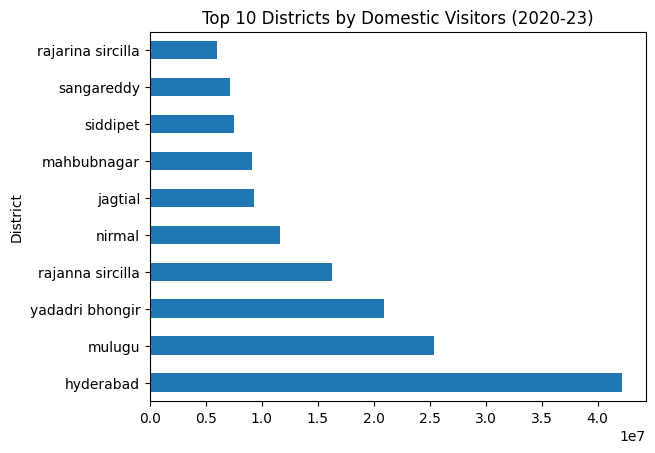

In [143]:
dom20_23.plot(kind = 'barh', title = 'Top 10 Districts by Domestic Visitors (2020-23)')
plt.show()

In [144]:
dom20_23.to_csv('dom20_23.csv')

In [145]:
for20_23 = foreign20_23.groupby('District')['Visitors'].sum().sort_values(ascending = False).head(10)

for20_23

District
hyderabad           280325
warangal (urban)       594
mulugu                 442
hanumakonda            217
warangal (rural)       146
mahbubnagar             74
nagarkurnool            50
jogulamba gadwal        42
yadadri bhongir         36
adilabad                 2
Name: Visitors, dtype: int64

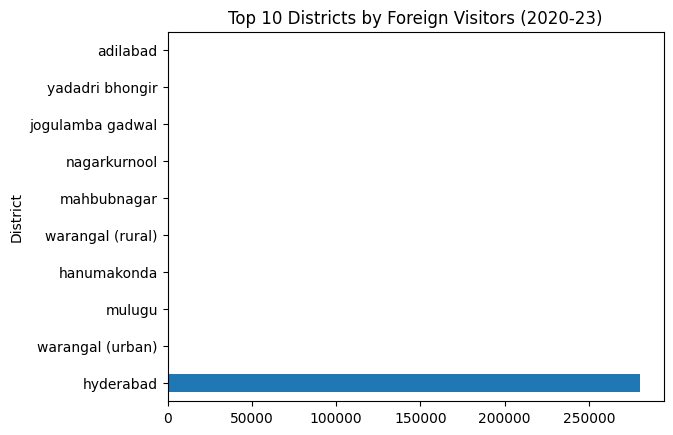

In [146]:
for20_23.plot(kind = 'barh', title = 'Top 10 Districts by Foreign Visitors (2020-23)')
plt.show()

**<h3> #CAGR (2020 - 2023) </h3>**

In [147]:
pd.set_option("display.max_rows", None)

In [148]:
domestic20_23.groupby(["year", "District"])['Visitors'].sum()

year  District                
2020  adilabad                      771847
      bhadradri kothagudem          882102
      hyderabad                    3251986
      jagtial                      1440359
      jangaon                       111000
      jayashankar bhoopalpally      202100
      jogulamba gadwal             1533627
      kamareddy                        385
      karimnagar                     44214
      khammam                       430825
      komaram bheem asifabad          7023
      mahabubabad                    46940
      mahbubnagar                  1295813
      mancherial                    102786
      medak                        1552155
      medchal                            0
      mulugu                      13088550
      nagarkurnool                 1163370
      nalgonda                       46830
      narayanapet                   630118
      nirmal                       1171539
      nizamabad                      91990
      peddapalli       

In [149]:
Districts = domestic20_23['District'].unique()
Districts

array(['adilabad', 'bhadradri kothagudem', 'hyderabad', 'jagtial',
       'jangaon', 'jayashankar bhoopalpally', 'jogulamba gadwal',
       'kamareddy', 'karimnagar', 'khammam', 'komaram bheem asifabad',
       'mahabubabad', 'mahbubnagar', 'mancherial', 'medak', 'medchal',
       'mulugu', 'nagarkurnool', 'nalgonda', 'narayanapet', 'nirmal',
       'nizamabad', 'peddapalli', 'rajanna sircilla', 'ranga reddy',
       'sangareddy', 'siddipet', 'suryapet', 'vikarabad', 'wanaparthy',
       'warangal (rural)', 'warangal (urban)', 'yadadri bhongir',
       'hanumakonda', 'jogulambagadwai', 'warangal', 'rajarina sircilla'],
      dtype=object)

In [150]:
dom_cagr = pd.DataFrame({"district":Districts})


In [151]:
domestic_2020 = domestic20_23[domestic20_23["year"] == 2020]

dom_2020 = []

for district in Districts:
    total_visitors = domestic_2020[domestic_2020["District"] == district]["Visitors"].sum()
    dom_2020.append(total_visitors)

dom_cagr["2020"] = dom_2020


In [152]:
domestic_2023 = domestic20_23[domestic20_23["year"] == 2023]

dom_2023 = []

for district in Districts:
    total_visitors = domestic_2023[domestic_2023["District"] == district]["Visitors"].sum()
    dom_2023.append(total_visitors)

dom_cagr["2023"] = dom_2023


In [153]:
dom_cagr.head()

,district,2020,2023
0,adilabad,771847,682745
1,bhadradri kothagudem,882102,1555714
2,hyderabad,3251986,18572694
3,jagtial,1440359,3520735
4,jangaon,111000,62355


In [154]:
Cagr=[]
for i in range(len(Districts)):
    f_val = dom_cagr.loc[i,"2023"]
    i_val = dom_cagr.loc[i,"2020"]
    cagrr = (((f_val/i_val)**(1/3))-1)
    Cagr.append(cagrr)

dom_cagr['CAGR'] = Cagr


C:\Users\karan\AppData\Local\Temp\ipykernel_7568\3108619351.py:5: RuntimeWarning: invalid value encountered in scalar divide
  cagrr = (((f_val/i_val)**(1/3))-1)
C:\Users\karan\AppData\Local\Temp\ipykernel_7568\3108619351.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  cagrr = (((f_val/i_val)**(1/3))-1)


In [155]:
dom_cagr.replace([np.inf, np.nan], 0, inplace = True)

In [156]:
dom_cagr

,district,2020,2023,CAGR
0,adilabad,771847,682745,-0.040064
1,bhadradri kothagudem,882102,1555714,0.208195
2,hyderabad,3251986,18572694,0.787484
3,jagtial,1440359,3520735,0.347062
4,jangaon,111000,62355,-0.174882
5,jayashankar bhoopalpally,202100,170016,-0.055995
6,jogulamba gadwal,1533627,928044,-0.154170
7,kamareddy,385,590,0.152914
8,karimnagar,44214,58756,0.099421
9,khammam,430825,678454,0.163429


In [157]:
dom_cagr.to_csv('dom_cagr')

In [158]:
top_dcagr = dom_cagr.sort_values(by = 'CAGR', ascending = False).head(3)
top_dcagr = top_dcagr.reset_index(drop=True)
top_dcagr

,district,2020,2023,CAGR
0,nalgonda,46830,452016,1.129168
1,nizamabad,91990,694736,0.961973
2,hyderabad,3251986,18572694,0.787484


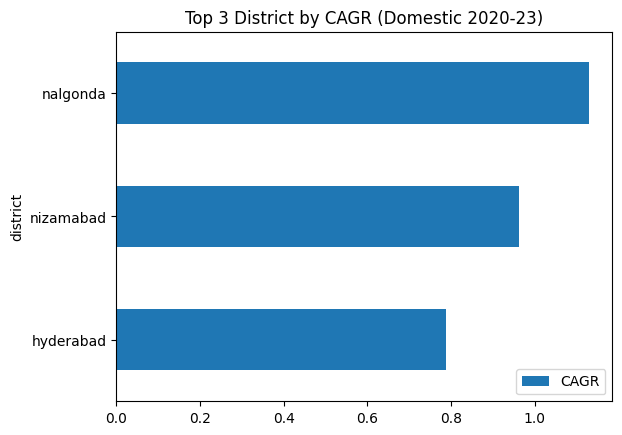

In [159]:
top_dcagr.plot('district', 'CAGR', kind = 'barh', title = 'Top 3 District by CAGR (Domestic 2020-23)' )
plt.gca().invert_yaxis()
plt.show()

In [160]:
btm_dcagr = dom_cagr.sort_values(by = 'CAGR', ascending = True).head(3)
btm_dcagr = btm_dcagr.reset_index(drop=True)
btm_dcagr

,district,2020,2023,CAGR
0,rajanna sircilla,5625539,0,-1.0
1,warangal (urban),648525,0,-1.0
2,warangal (rural),108770,0,-1.0


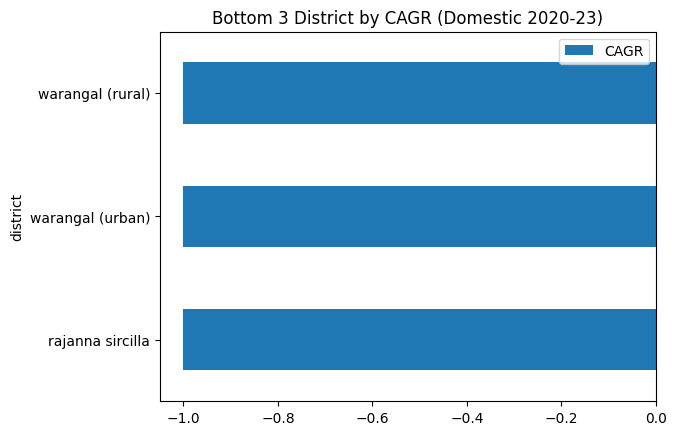

In [161]:
btm_dcagr.plot('district', 'CAGR', kind = 'barh', title = 'Bottom 3 District by CAGR (Domestic 2020-23)')
plt.show()
                        

In [162]:
foreign20_23.groupby(["year", "District"])['Visitors'].sum()

year  District                
2020  adilabad                         0
      bhadradri kothagudem             0
      hyderabad                    45859
      jagtial                          0
      jangaon                          0
      jayashankar bhoopalpally         0
      jogulamba gadwal                42
      kamareddy                        0
      karimnagar                       0
      khammam                          0
      komaram bheem asifabad           0
      mahabubabad                      0
      mahbubnagar                     74
      mancherial                       0
      medak                            0
      medchal                          0
      mulugu                         145
      nagarkurnool                    50
      nalgonda                         0
      narayanpet                       0
      nirmal                           0
      nizamabad                        0
      peddapalli                       0
      rajanna sircilla    

In [163]:
for_cagr = pd.DataFrame({"district":Districts})


In [164]:
foreign_2020 = foreign20_23[foreign20_23["year"] == 2020]

for_2020 = []

for district in Districts:
    total_visitors = foreign_2020[foreign_2020["District"] == district]["Visitors"].sum()
    for_2020.append(total_visitors)

for_cagr["2020"] = for_2020


In [165]:
foreign_2023 = foreign20_23[foreign20_23["year"] == 2023]

for_2023 = []

for district in Districts:
    total_visitors = foreign_2023[foreign_2023["District"] == district]["Visitors"].sum()
    for_2023.append(total_visitors)

for_cagr["2023"] = for_2023

In [166]:
Cagr=[]
for i in range(len(Districts)):
    f_val = for_cagr.loc[i,"2023"]
    i_val = for_cagr.loc[i,"2020"]
    cagrr = (((f_val/i_val)**(1/3))-1)
    Cagr.append(cagrr)

for_cagr['CAGR'] = Cagr

C:\Users\karan\AppData\Local\Temp\ipykernel_7568\765813455.py:5: RuntimeWarning: invalid value encountered in scalar divide
  cagrr = (((f_val/i_val)**(1/3))-1)
C:\Users\karan\AppData\Local\Temp\ipykernel_7568\765813455.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  cagrr = (((f_val/i_val)**(1/3))-1)


In [167]:
for_cagr.replace([np.inf, np.nan], 0, inplace = True)

In [168]:
for_cagr.to_csv('for_cagr')

In [169]:
top_fcagr = for_cagr.sort_values(by = 'CAGR', ascending = False).head(3)
top_fcagr = top_fcagr.reset_index(drop=True)
top_fcagr

,district,2020,2023,CAGR
0,hyderabad,45859,160545,0.518416
1,adilabad,0,0,0.000000
2,suryapet,0,0,0.000000


In [170]:
btm_fcagr = for_cagr.sort_values(by = 'CAGR', ascending = True).head(3)
btm_fcagr = btm_fcagr.reset_index(drop=True)
btm_fcagr

,district,2020,2023,CAGR
0,nagarkurnool,50,0,-1.0
1,warangal (urban),530,0,-1.0
2,jogulamba gadwal,42,0,-1.0
